### 뉴스검색 , 주식검색 

In [2]:
import requests
from pandas import DataFrame
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os
import pandas as pd
import numpy as np
import warnings

In [3]:
# https://www.data.go.kr/data/15061057/fileData.do

In [4]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BAF1-9AE2

 C:\jupyter_home\pythonSource\appSource\crawling 디렉터리

2023-02-17  오후 03:05    <DIR>          .
2023-02-17  오후 03:05    <DIR>          ..
2023-02-16  오후 01:01    <DIR>          .ipynb_checkpoints
2023-02-13  오전 10:10            21,111 crawling1.ipynb
2023-02-13  오전 11:45           756,573 crawling2.ipynb
2023-02-13  오후 03:03         1,580,981 crawling3.ipynb
2023-02-14  오후 05:07           158,899 crawling4.ipynb
2023-02-17  오후 03:05            99,738 crawling5.ipynb
2023-02-15  오후 02:29         1,763,939 crawling6.ipynb
2023-02-15  오후 05:35           140,510 crawling7.ipynb
2023-02-16  오후 06:07           336,106 crawling8.ipynb
2023-02-14  오후 01:22    <DIR>          data
2023-02-16  오후 05:14            33,618 movie2015java1weeee.jpg
2023-02-16  오후 05:14            34,710 movie2015java2weeee.jpg
2023-02-16  오후 05:14            36,331 movie2015java3weeee.jpg
2023-02-16  오후 05:14            35,863 movie2015java4weeee.jpg
2023-02-16  오후 05:14  

In [5]:
for root, dirs, files in os.walk("C:\jupyter_home"):
    print(files)

['212121.ipynb', 'calcex.ipynb', 'plt.png', 'python_pr.ipynb', 'step01_basic.ipynb', 'step02_variable.ipynb', 'step03_formatter.ipynb', 'step04_operator.ipynb', 'step05_if.ipynb', 'step06_while.ipynb', 'step07_for.ipynb']
['212121-checkpoint.ipynb', 'python_pr-checkpoint.ipynb', 'step01_basic-checkpoint.ipynb', 'step02_variable-checkpoint.ipynb', 'step03_formatter-checkpoint.ipynb', 'step04_operator-checkpoint.ipynb', 'step05_if-checkpoint.ipynb', 'step06_while-checkpoint.ipynb', 'step07_for-checkpoint.ipynb']
['Untitled.ipynb']
['Untitled-checkpoint.ipynb']
['HoonWhitecatR.ttf', 'malgun.ttf', 'MaplestoryBold.ttf', 'NanumBarunGothic.ttf', 'THEdog.ttf']
['alice.png', 'alice_color.png', 'koreamap.jpg', 'pic.jpg', 'stormtrooper_mask.png']
['bmi_practice.ipynb', 'class_super_override_Practice.ipynb', 'for_if_while_practice.ipynb', 'function_practice.ipynb', 'test.ipynb', 'test.txt', 'test2.ipynb']
['bmi_practice-checkpoint.ipynb', 'class_super_override_Practice-checkpoint.ipynb', 'for_if_w

In [6]:
df_last=pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')
print(df_last.shape) # ------- 4335, 5
df_last

(4335, 5)


,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN


In [7]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BAF1-9AE2

 C:\jupyter_home\pythonSource\appSource\crawling\data 디렉터리

2023-02-14  오후 01:22    <DIR>          .
2023-02-14  오후 01:22    <DIR>          ..
2023-02-14  오후 01:17           294,801 apt_20211231.csv
2023-02-08  오후 05:31             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2023-02-08  오후 05:31           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
               3개 파일             459,474 바이트
               2개 디렉터리  61,909,602,304 바이트 남음


In [8]:
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [9]:
print(df_last.isnull().sum())
print()
print(df_first.isnull().sum())

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64


In [10]:
df_last['분양가격(㎡)']

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4330    3882
4331     NaN
4332    3898
4333     NaN
4334    3601
Name: 분양가격(㎡), Length: 4335, dtype: object

In [11]:
df_last['연도']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
4330    2019
4331    2019
4332    2019
4333    2019
4334    2019
Name: 연도, Length: 4335, dtype: int64

In [12]:
 pd.to_numeric(df_last['분양가격(㎡)']) # ----------- 원본에 NaN 있어서 에러난다

ValueError: Unable to parse string "  " at position 28

In [13]:
pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce') 

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격(㎡), Length: 4335, dtype: float64

## errors: error는 총 3개의 옵션이 존재합니다.

- errors = 'ignore' -> 만약 숫자로 변경할 수 없는 데이터라면 숫자로 변경하지 않고 원본 데이터를 그대로 반환합니다.

- errors = 'coerce' -> 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환합니다.

- errors = 'raise' -> 만약 숫자로 변경할 수 없는 데이터라면 에러를 일으키며 코드를 중단합니다.

In [14]:
df_last['분양가격']=pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last['평당분양가격']=df_last['분양가격']*3.3

In [15]:
df_last['평당분양가격']

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
4330    12810.6
4331        NaN
4332    12863.4
4333        NaN
4334    11883.3
Name: 평당분양가격, Length: 4335, dtype: float64

In [16]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [17]:
df_last['분양가격']

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격, Length: 4335, dtype: float64

In [18]:
df_last['분양가격'].describe() # ---- 같은 데이터여도 타입에 따라 표현이 달라진다

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [19]:
df_last['분양가격(㎡)'].describe() # ---- 같은 데이터여도 타입에 따라 표현이 달라진다

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [20]:
df_last['분양가격(㎡)'].unique()

array(['5841', '5652', '5882', ..., '3143', '2640', '3065'], dtype=object)

In [21]:
df_last['분양가격'].unique()

array([5841., 5652., 5882., ..., 3143., 2640., 3065.])

In [22]:
# 전용면적 칼럼 새로 만들기
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last["전용면적"]


0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [23]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [24]:
# 열 지우기
df_last.drop('규모구분', '분양가격(㎡)')

C:\Users\BIT'\AppData\Local\Temp\ipykernel_1180\4173211103.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_last.drop('규모구분', '분양가격(㎡)')


ValueError: No axis named 분양가격(㎡) for object type DataFrame

In [25]:
# 열 지우기
df_last=df_last.drop(['규모구분', '분양가격(㎡)'], axis=1)

In [26]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [27]:
# 지역별 평당분양가 평균
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [28]:
# 연도별, 지역별 평당분양가 평균
g=df_last.groupby(['연도', '지역명'])['평당분양가격'].mean()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [29]:
# 연도별, 지역별 평당분양가 표준편차
g=df_last.groupby(['연도', '지역명'])['평당분양가격'].std()
g

연도    지역명
2015  강원      250.536854
      경기      801.307294
      경남     1172.105264
      경북      413.196874
      광주      290.409375
                ...     
2019  전남      846.746776
      전북      569.705735
      제주      928.732935
      충남      591.598150
      충북      631.082504
Name: 평당분양가격, Length: 85, dtype: float64

In [30]:
# 연도별, 지역별 평당분양가 분산
g=df_last.groupby(['연도', '지역명'])['평당분양가격'].var()
g

연도    지역명
2015  강원     6.276872e+04
      경기     6.420934e+05
      경남     1.373831e+06
      경북     1.707317e+05
      광주     8.433760e+04
                 ...     
2019  전남     7.169801e+05
      전북     3.245646e+05
      제주     8.625449e+05
      충남     3.499884e+05
      충북     3.982651e+05
Name: 평당분양가격, Length: 85, dtype: float64

In [31]:
# 전용면적으로 분양가격의 최고을 구합니다.
df_last.groupby(["전용면적"])["평당분양가격"].max()

전용면적
102㎡~       29663.7
60㎡         27327.3
60㎡~85㎡     28340.4
85㎡~102㎡    42002.4
전체          26730.0
Name: 평당분양가격, dtype: float64

In [32]:
# 전용면적으로 분양가격의 중위값 구합니다.
df_last.groupby(["전용면적"])["평당분양가격"].median()

전용면적
102㎡~       9867.0
60㎡         8959.5
60㎡~85㎡     9494.1
85㎡~102㎡    9655.8
전체          9527.1
Name: 평당분양가격, dtype: float64

In [33]:
# 전용면적으로 분양가격의 합을 구합니다.
df_last.groupby(["전용면적"])["평당분양가격"].sum()

전용면적
102㎡~       8995328.1
60㎡         8206733.7
60㎡~85㎡     8637944.7
85㎡~102㎡    7801612.5
전체          8642188.5
Name: 평당분양가격, dtype: float64

In [34]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [35]:
x=df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean()
x

지역명  전용면적    
강원   102㎡~       8311.380000
     60㎡         7567.098000
     60㎡~85㎡     7485.588000
     85㎡~102㎡    8749.557143
     전체          7477.536000
                    ...     
충북   102㎡~       8195.352000
     60㎡         7103.118000
     60㎡~85㎡     7264.488000
     85㎡~102㎡    8391.306000
     전체          7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [36]:
df_last.groupby(['지역명', '전용면적'])['평당분양가격'].median()

지역명  전용면적    
강원   102㎡~       7906.80
     60㎡         7487.70
     60㎡~85㎡     7494.30
     85㎡~102㎡    9339.00
     전체          7517.40
                  ...   
충북   102㎡~       8250.00
     60㎡         7121.40
     60㎡~85㎡     7099.95
     85㎡~102㎡    8500.80
     전체          7010.85
Name: 평당분양가격, Length: 85, dtype: float64

In [37]:
for i in df_last.groupby(['지역명', '전용면적'])['평당분양가격']:

IndentationError: expected an indented block (3106018318.py, line 1)

In [38]:
df_last.groupby(['전용면적','지역명']).mean().unstack().round()

연도                                                          \
지역명           강원      경기      경남      경북      광주      대구      대전      부산   
전용면적                                                                       
102㎡~     2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0   
60㎡       2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0   
60㎡~85㎡   2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0   
85㎡~102㎡  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0   
전체        2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0  2017.0   

                          ...   평당분양가격                                      \
지역명           서울      세종  ...       부산       서울       세종       울산       인천   
전용면적                      ...                                                
102㎡~     2017.0  2017.0  ...  13208.0  23446.0  10107.0   9974.0  14362.0   
60㎡       2017.0  2017.0  ...  11354.0  23213.0   9324.0   9202.0  11241.0   
60㎡~85㎡   2017.0  2017.0  ...  11865.0  22787.0   9775.0  10503.0  11384.0   
85㎡~102㎡  2017.0  2017.0  ...  12073.0  25944.0   9848.0   8861.0  11528.0   
전체        2017.0  2017.0  ...  11936.0  22610.0   9805.0  10493.0  11257.0   

                                                   
지역명           전남      전북       제주      충남      충북  
전용면적                                               
102㎡~     8168.0  8194.0  10523.0  8689.0  8195.0  
60㎡       7210.0  7610.0  14022.0  7911.0  7103.0  
60㎡~85㎡   7269.0  7271.0  10621.0  7819.0  7264.0  
85㎡~102㎡  7909.0  8276.0  10709.0  9120.0  8391.0  
전체        7284.0  7293.0  10785.0  7815.0  7219.0  

[5 rows x 68 columns]

In [39]:
z=df_last.groupby(['연도','지역명'])['평당분양가격'].mean()
z

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [40]:
z.unstack().transpose()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


In [41]:
z.loc[2018, '강원']

8219.255

In [42]:
z.unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


In [43]:
data =[1,2,3,4,5]
idx = [['idx1','idx1','idx2','idx2','idx2'],['row1','row2','row1','row2','row3']]
df = pd.Series(data=data, index = idx)
print(df)

idx1  row1    1
      row2    2
idx2  row1    3
      row2    4
      row3    5
dtype: int64


In [44]:
print(df.unstack())

      row1  row2  row3
idx1   1.0   2.0   NaN
idx2   3.0   4.0   5.0


In [45]:
print(df.unstack().transpose())

      idx1  idx2
row1   1.0   3.0
row2   2.0   4.0
row3   NaN   5.0


In [46]:
pd.pivot_table(df_last, index=['지역명'], values=['평당분양가격'], aggfunc='mean')

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [47]:
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [48]:
df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [49]:
#최근 데이터 시각화 
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic")

In [50]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

지역명
전남     7565.316532
충북     7634.655600
전북     7724.235484
강원     7890.750000
충남     8233.651883
경북     8376.536515
경남     9268.778138
세종     9796.516456
광주     9951.535821
울산    10014.902013
대전    10253.333333
제주    11241.276712
인천    11915.320732
대구    11980.895455
부산    12087.121200
경기    13356.895200
서울    23599.976400
Name: 평당분양가격, dtype: float64


<AxesSubplot:xlabel='지역명'>

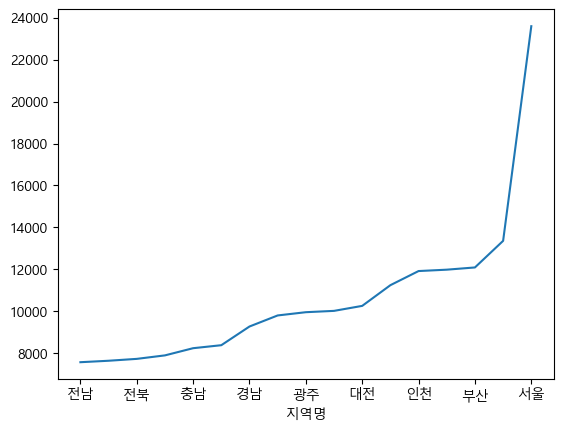

In [51]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.
plt.rcParams['font.family'] = 'Malgun Gothic'
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=True)
print(g)
g.plot()

<AxesSubplot:xlabel='지역명'>

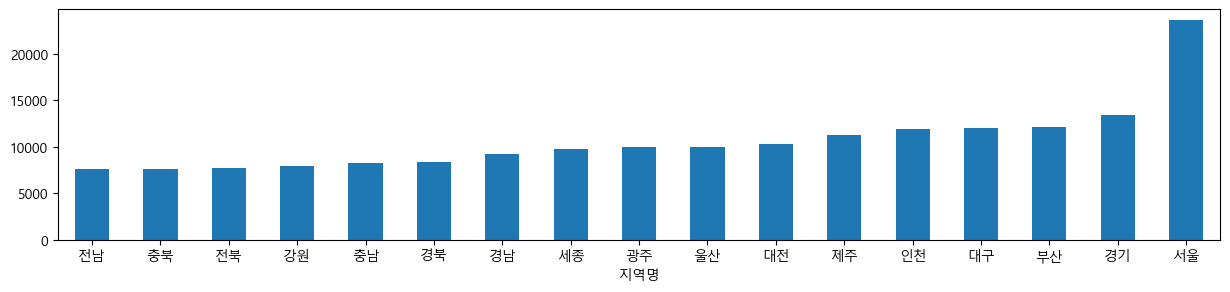

In [52]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
g.plot.bar(rot=0, figsize=(15, 3))

<AxesSubplot:xlabel='전용면적'>

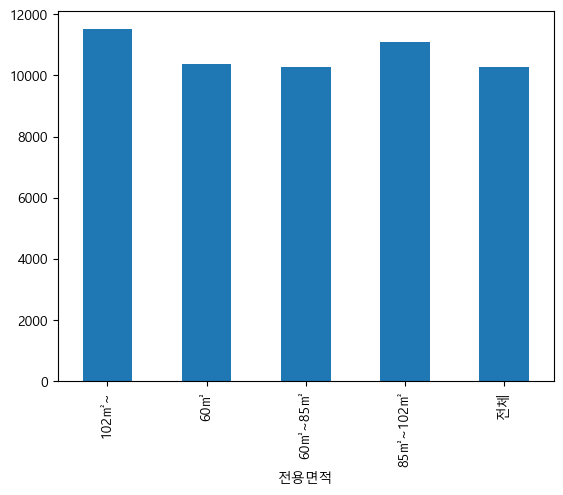

In [53]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

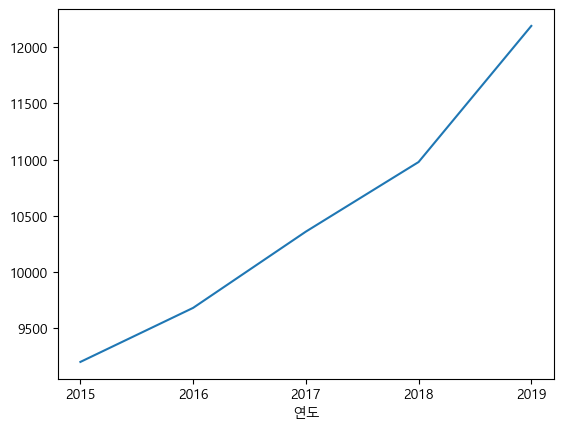

In [54]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# 연도에 소숫점이 생기지 않게 표시하고자 한다면 ax.xaxis.set_major_locator를 사용해서 integer로 설정합니다.
from matplotlib.ticker import MaxNLocator
ax=plt.figure().gca()
df_last.groupby(['연도'])['평당분양가격'].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [55]:
#Box Plot
df_last.pivot_table(index="월",columns="연도")

분양가격                                                      \
연도         2015         2016         2017         2018         2019   
월                                                                     
1           NaN  2828.493827  3059.130952  3248.226667  3495.618421   
2           NaN  2836.800000  3063.904762  3262.626667  3507.513158   
3           NaN  2855.538462  3062.857143  3304.693333  3518.210526   
4           NaN  2909.695122  3096.130952  3309.311688  3569.053333   
5           NaN  2909.817073  3139.036145  3359.844156  3629.210526   
6           NaN  2932.134146  3161.096386  3309.675325  3758.146667   
7           NaN  2939.560976  3196.829268  3293.447368  3765.106667   
8           NaN  2945.158537  3201.475610  3276.105263  3795.120000   
9           NaN  2950.804878  3207.151899  3307.653846  3796.233766   
10  2753.481481  3007.341176  3151.468354  3373.717949  3823.961538   
11  2793.370370  3022.047619          NaN  3401.443038  3832.662338   
12  2819.271605  3058.261905  3211.400000  3470.855263  3825.105263   

         평당분양가격                                                          
연도         2015          2016          2017          2018          2019  
월                                                                        
1           NaN   9334.029630  10095.132143  10719.148000  11535.540789  
2           NaN   9361.440000  10110.885714  10766.668000  11574.793421  
3           NaN   9423.276923  10107.428571  10905.488000  11610.094737  
4           NaN   9601.993902  10217.232143  10920.728571  11777.876000  
5           NaN   9602.396341  10358.819277  11087.485714  11976.394737  
6           NaN   9676.042683  10431.618072  10921.928571  12401.884000  
7           NaN   9700.551220  10549.536585  10868.376316  12424.852000  
8           NaN   9719.023171  10564.869512  10811.147368  12523.896000  
9           NaN   9737.656098  10583.601266  10915.257692  12527.571429  
10  9086.488889   9924.225882  10399.845570  11133.269231  12619.073077  
11  9218.122222   9972.757143           NaN  11224.762025  12647.785714  
12  9303.596296  10092.264286  10597.620000  11453.822368  12622.847368

In [56]:
df_last.pivot_table(index="월",columns="연도",values='평당분양가격')

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<AxesSubplot:xlabel='월'>

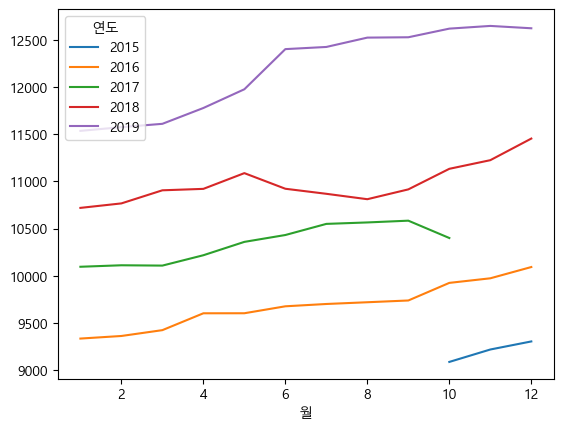

In [57]:
df_last.pivot_table(index="월",columns="연도",values='평당분양가격').plot()

<AxesSubplot:>

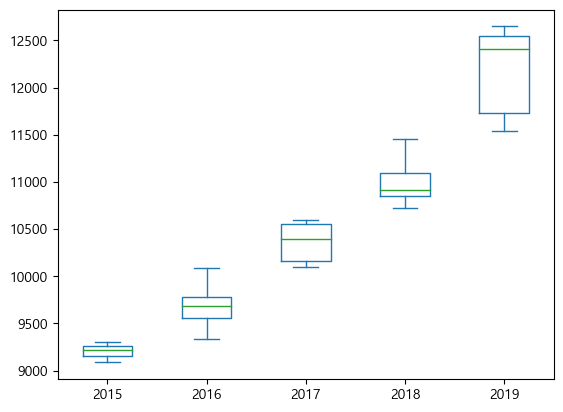

In [58]:
df_last.pivot_table(index="월",columns="연도",values='평당분양가격').plot.box()

<AxesSubplot:xlabel='월'>

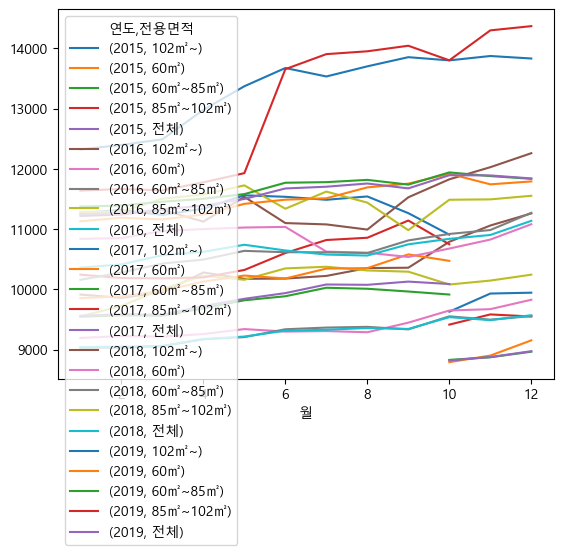

In [59]:
p=df_last.pivot_table(index='월',columns=['연도','전용면적'],values='평당분양가격')
p.plot()

<AxesSubplot:>

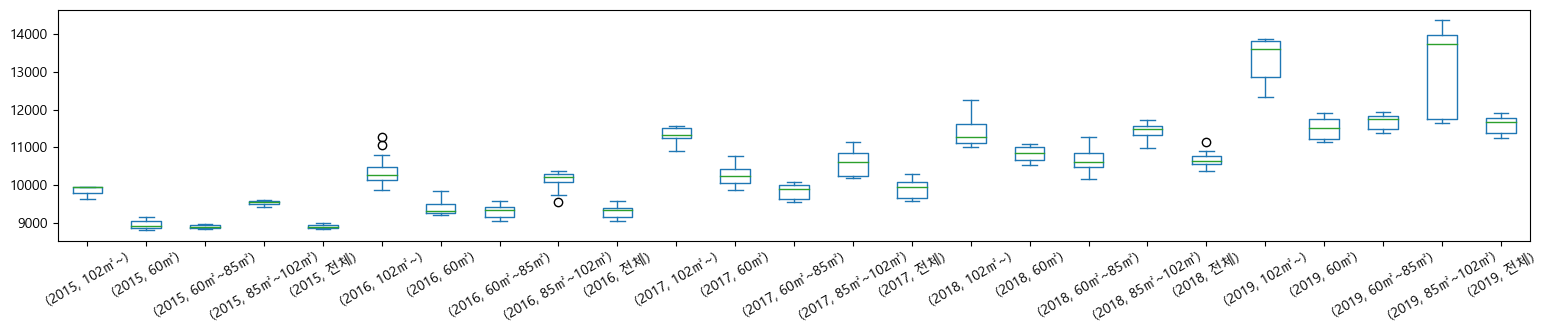

In [60]:
p=df_last.pivot_table(index='월',columns=['연도','전용면적'],values='평당분양가격')
p.plot.box(figsize=(19,3),rot=30)

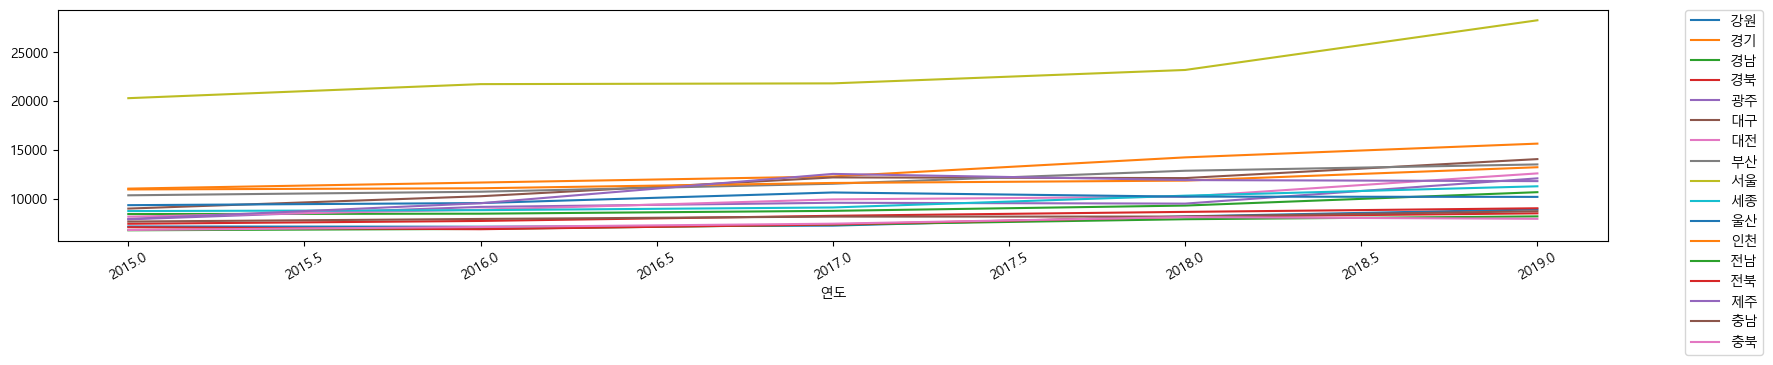

In [61]:
p=df_last.pivot_table(index="연도",columns='지역명',values='평당분양가격')
p.plot(figsize=(20,3),rot=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

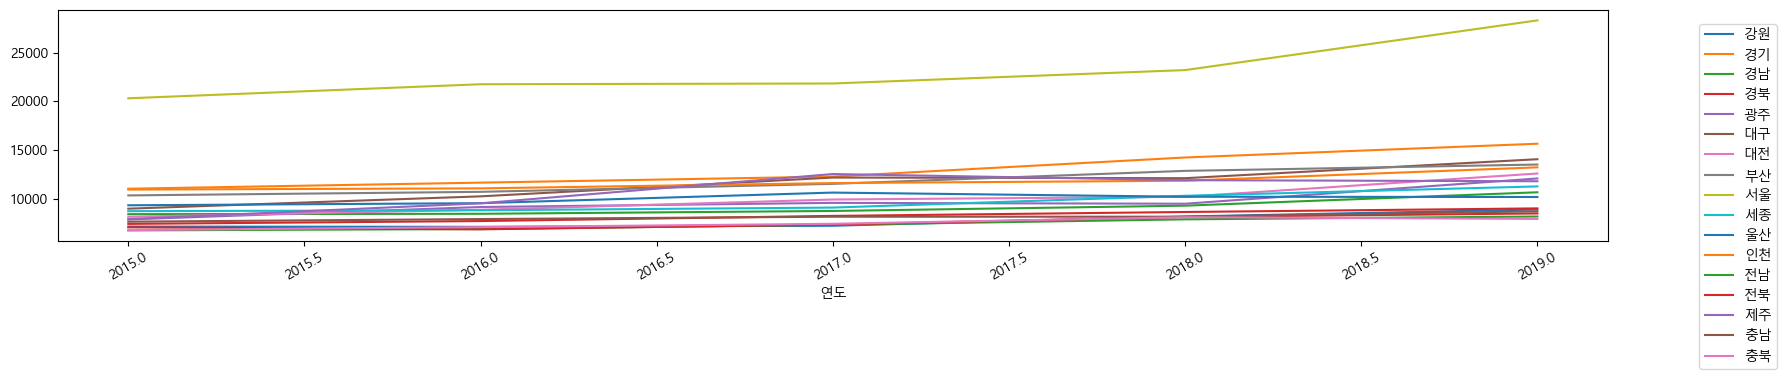

In [63]:
p=df_last.pivot_table(index="연도",columns='지역명',values='평당분양가격')
p.plot(figsize=(20,3),rot=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.) # --- 앵커가 1이면 표 밖으로 나간다.

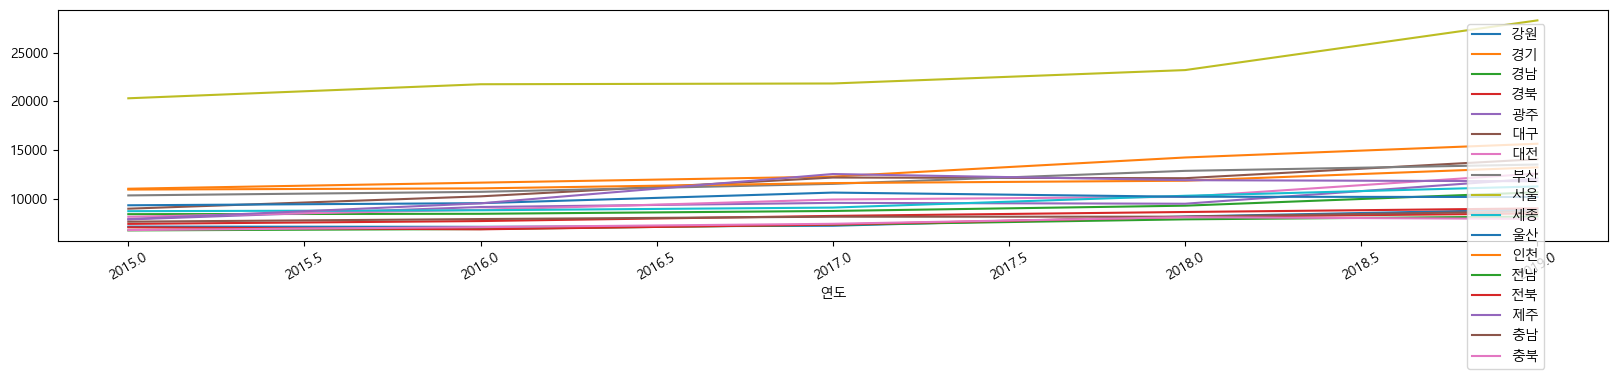

In [64]:
p=df_last.pivot_table(index="연도",columns='지역명',values='평당분양가격')
p.plot(figsize=(20,3),rot=30)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=1.) # --- 1보다 작으면 표 안으로 들어온다

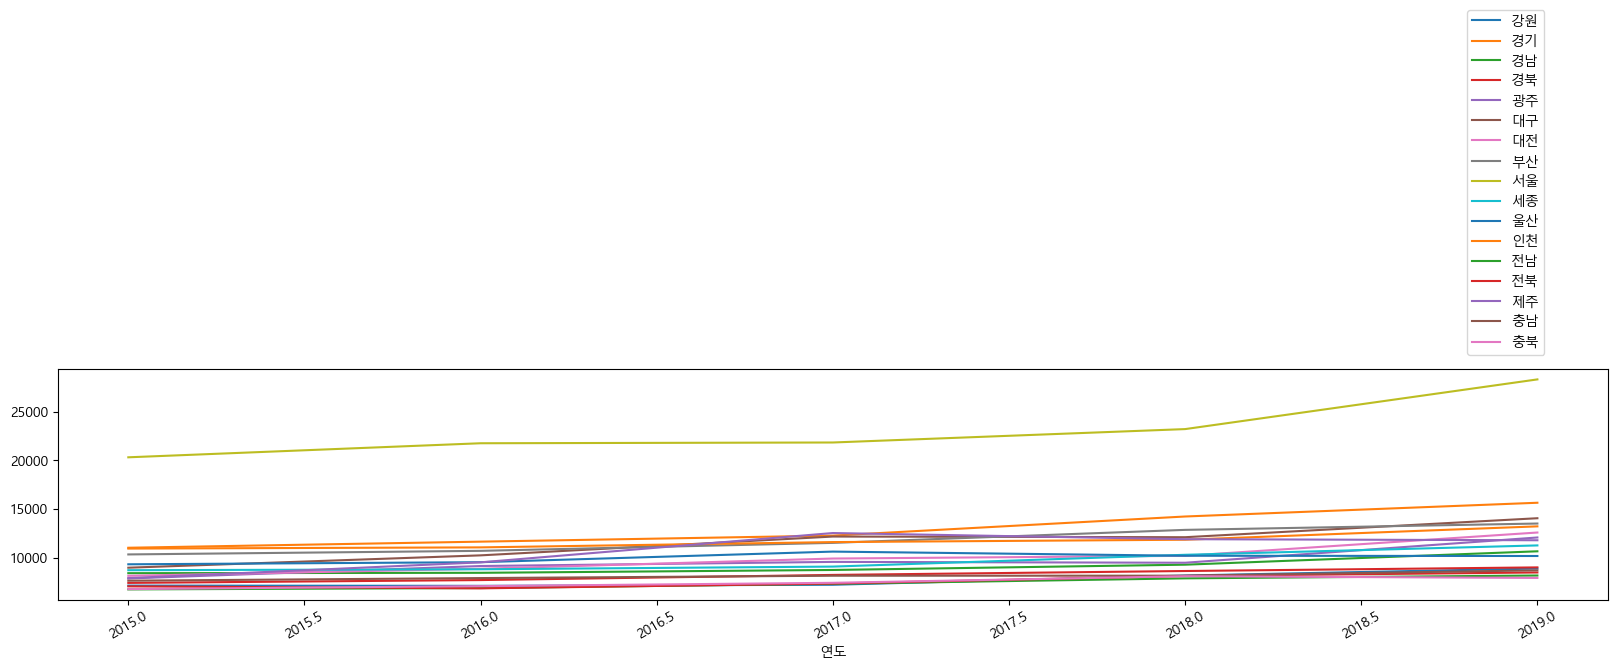

In [66]:
p=df_last.pivot_table(index="연도",columns='지역명',values='평당분양가격')
p.plot(figsize=(20,3),rot=30)
plt.legend(bbox_to_anchor=(0.9, 1), loc=3, borderaxespad=1.) # --- loc 숫자에 따라 기준 위치 달라짐

# SeaBorn

In [70]:
import seaborn as sns
%matplotlib inline

In [71]:
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [72]:
sns

<module 'seaborn' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

In [73]:
plt.figure(figsize=(10, 3))

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<AxesSubplot:>

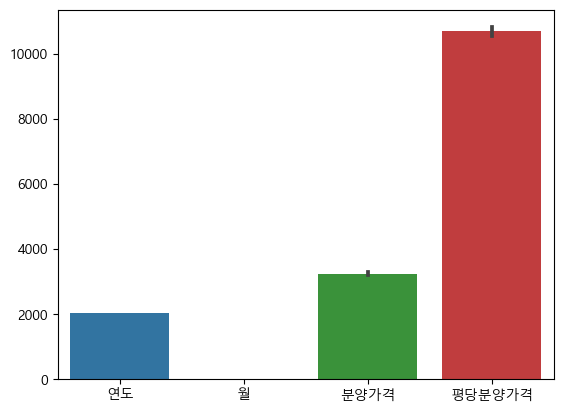

In [74]:
sns.barplot(data=df_last)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

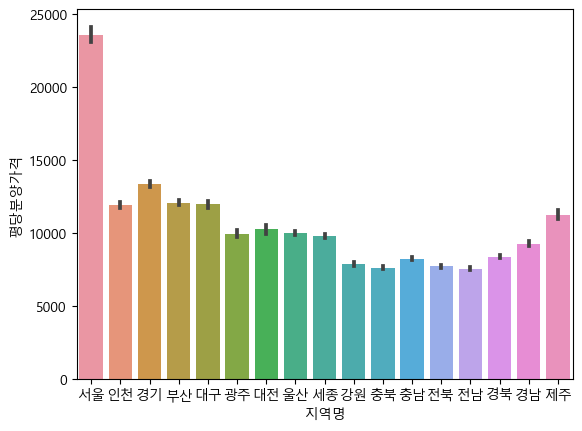

In [75]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

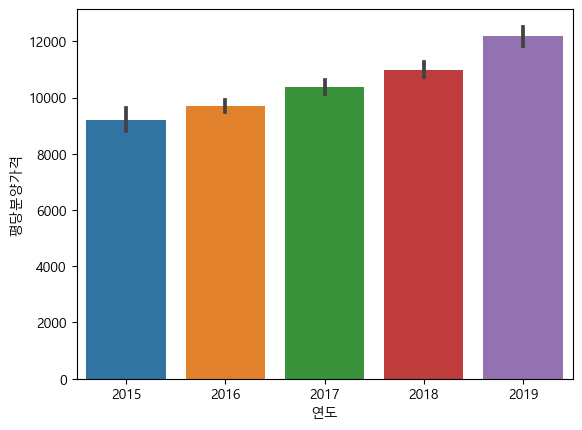

In [76]:
sns.barplot(data=df_last, x='연도', y='평당분양가격')

### CATPLOT

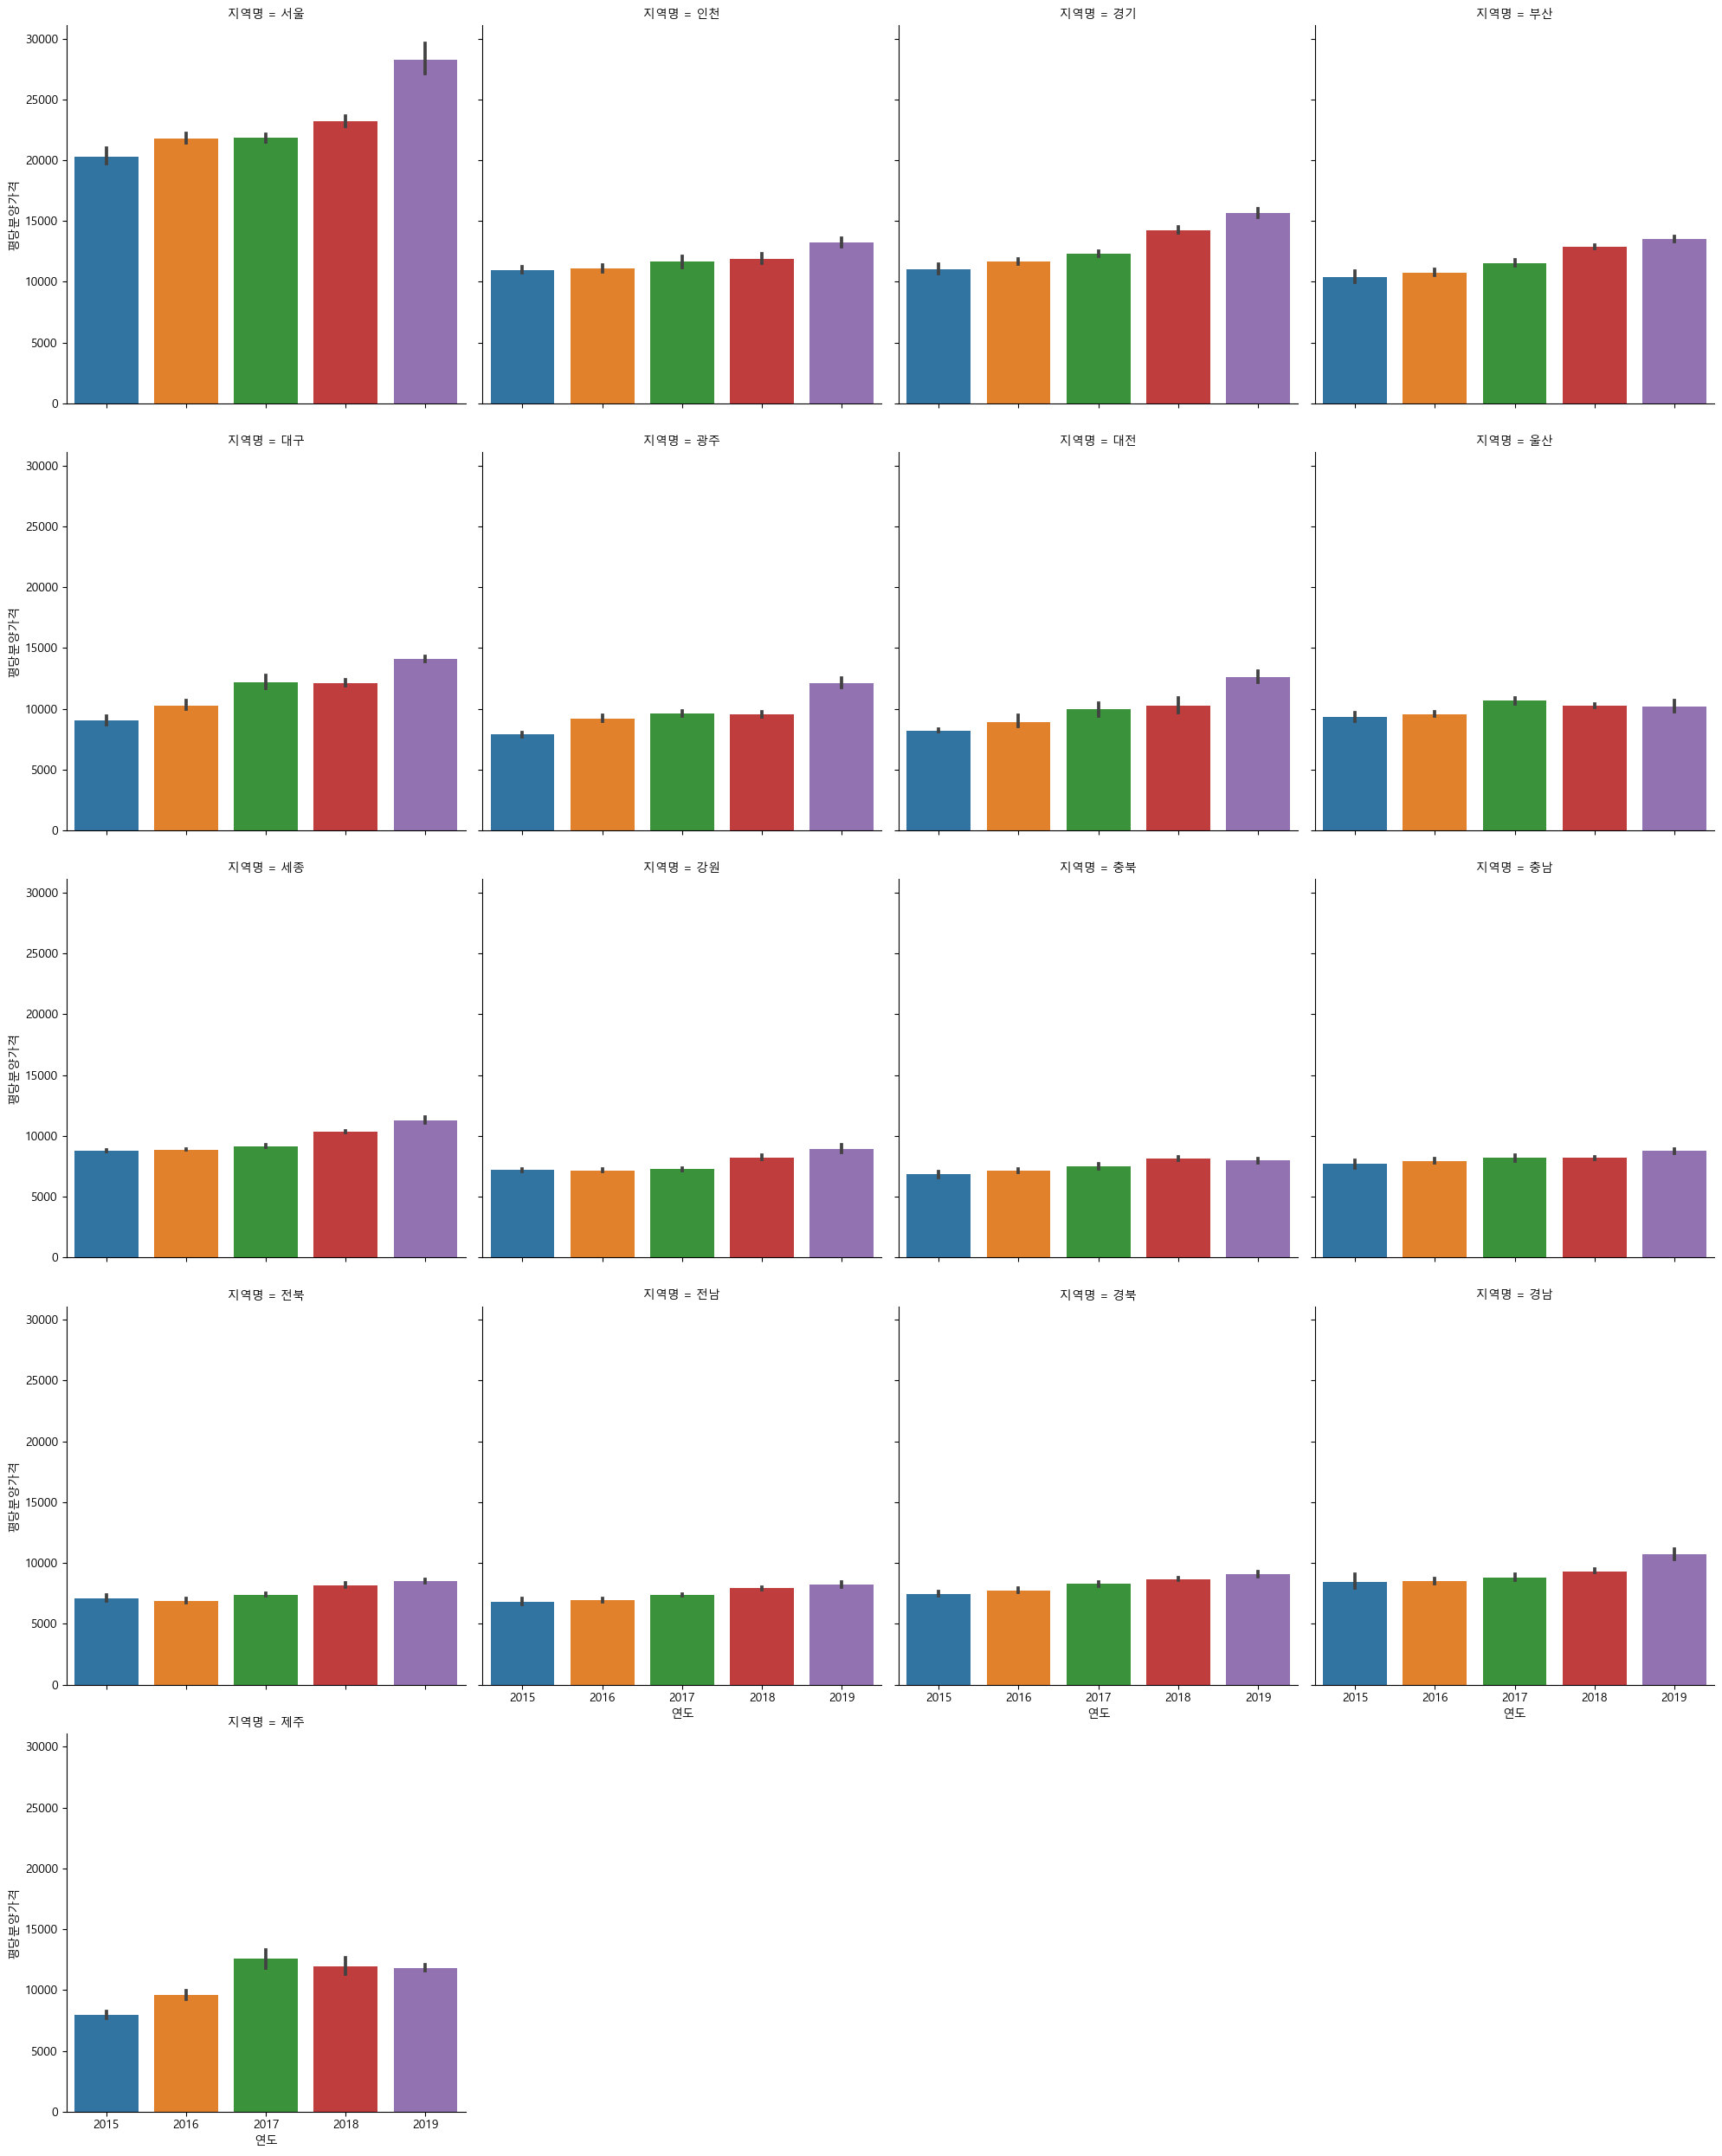

In [78]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

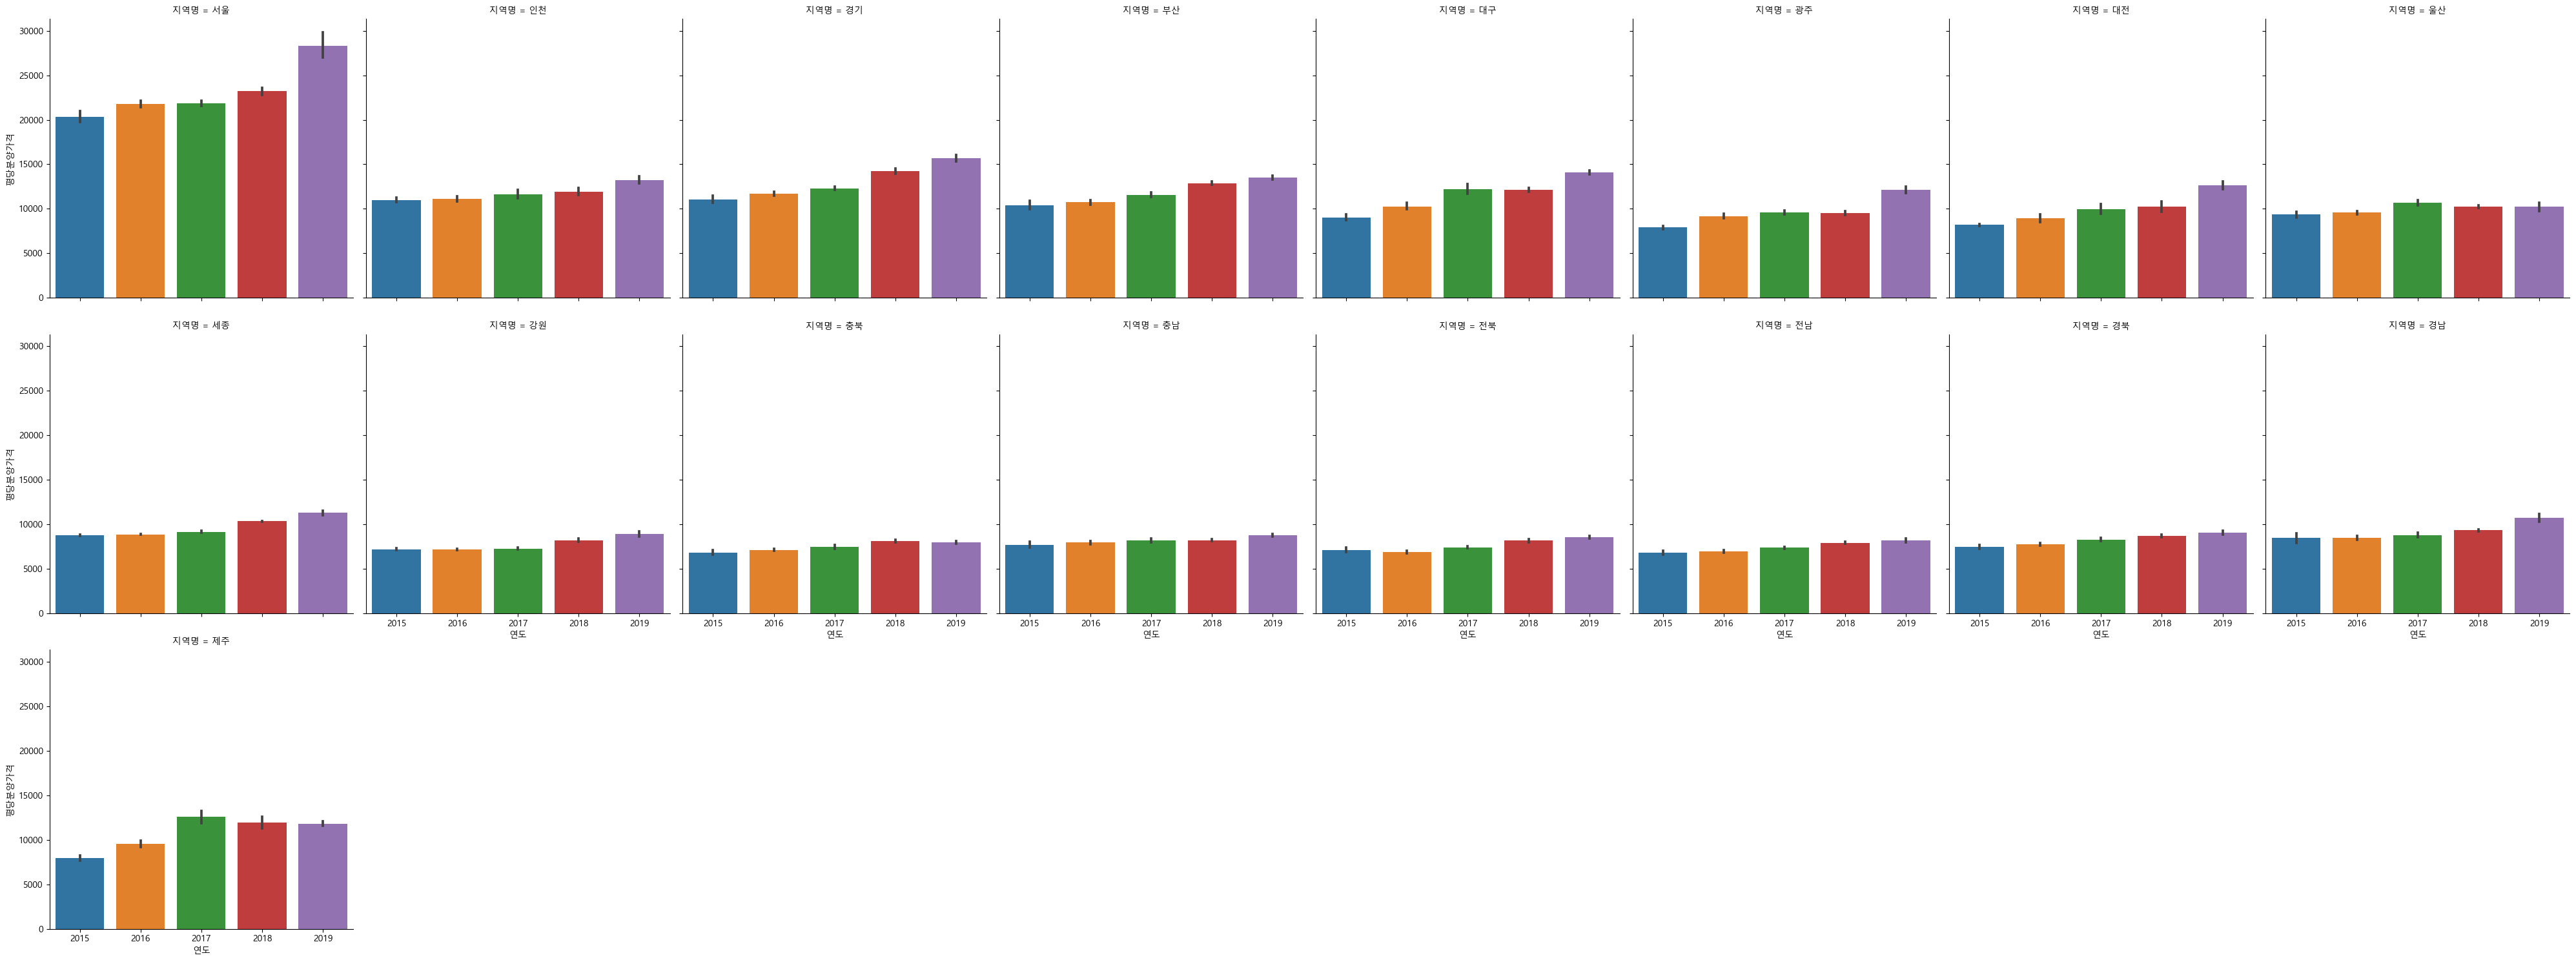

In [80]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=8)

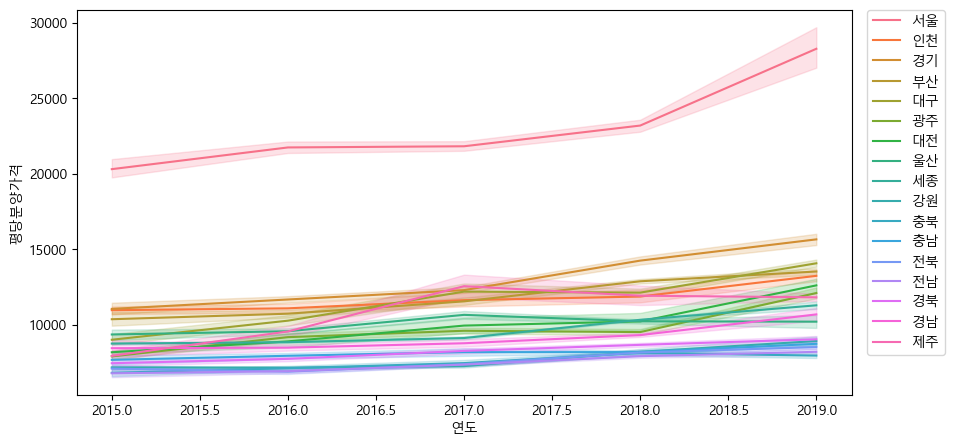

In [81]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

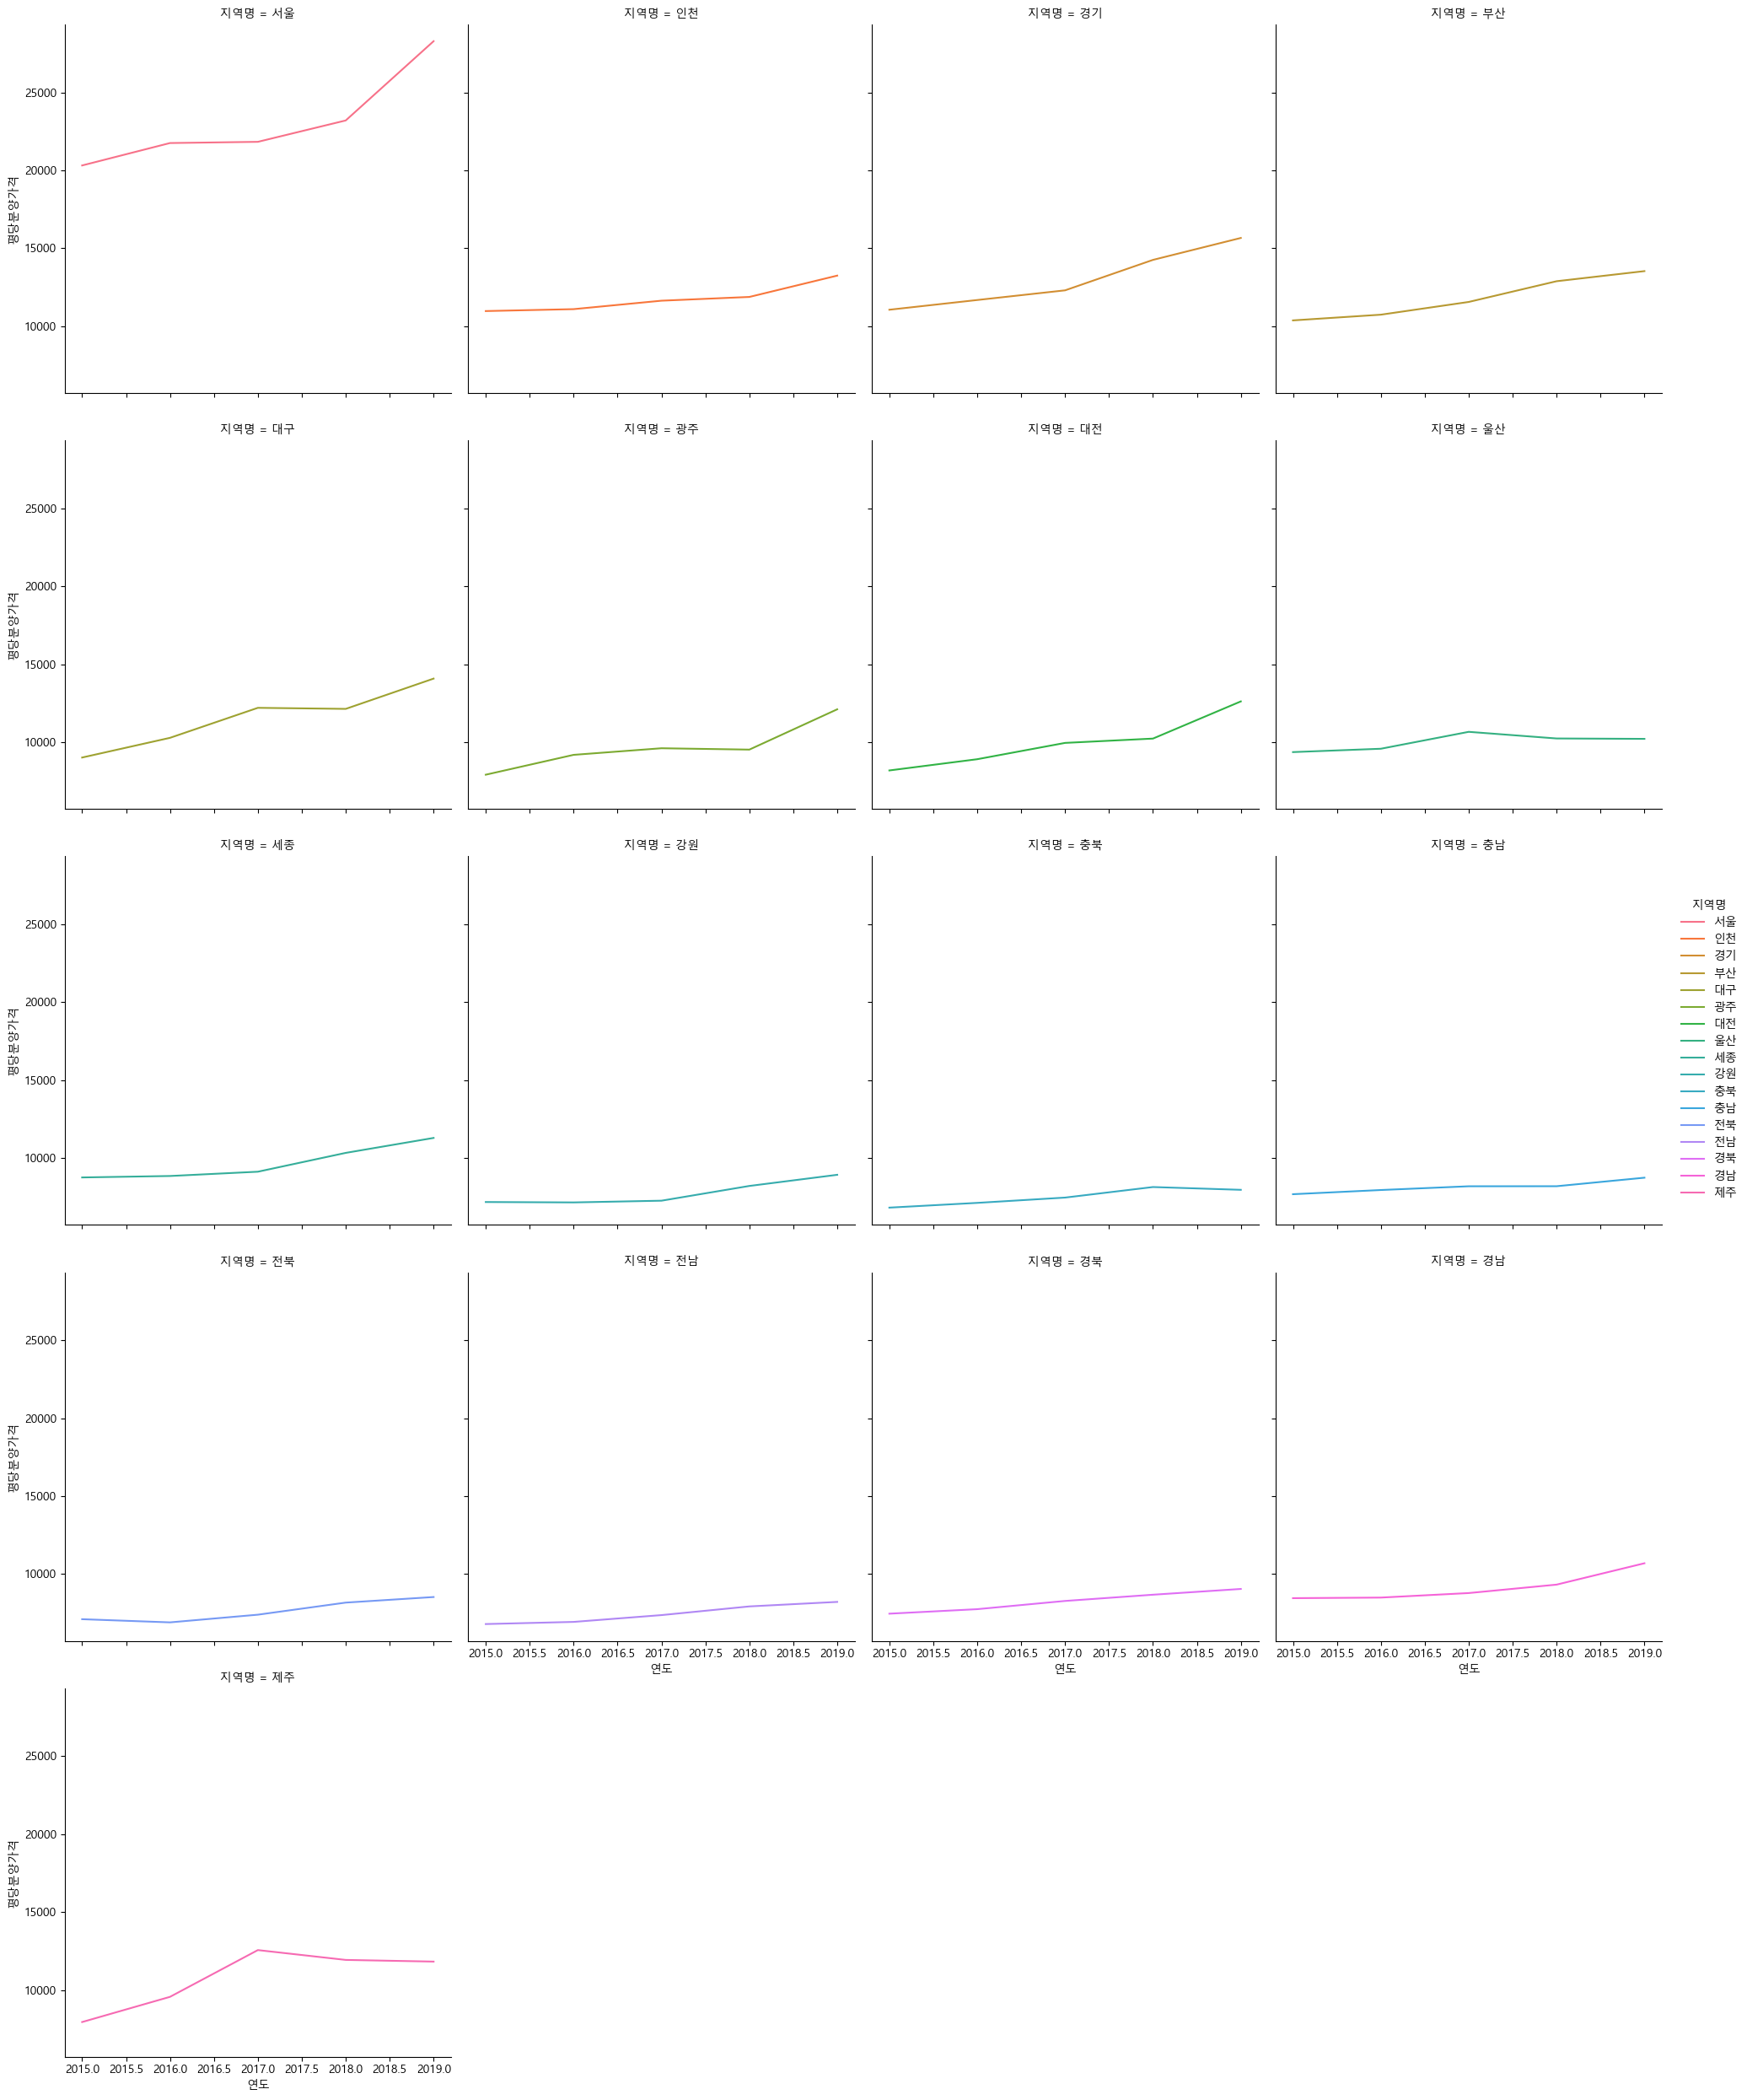

In [82]:
sns.relplot(data=df_last, x="연도", y="평당분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None) # ---- ci = 신뢰도. 검은 선

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

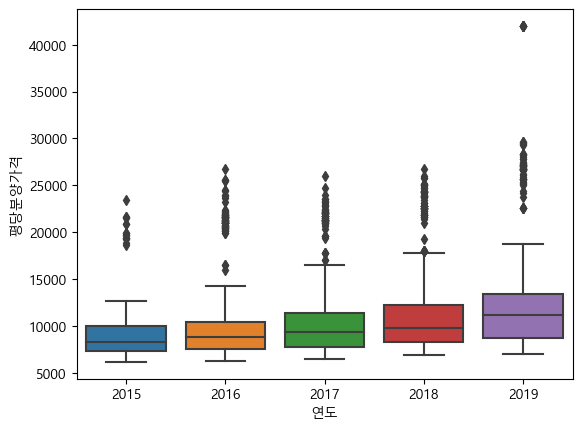

In [83]:
sns.boxplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

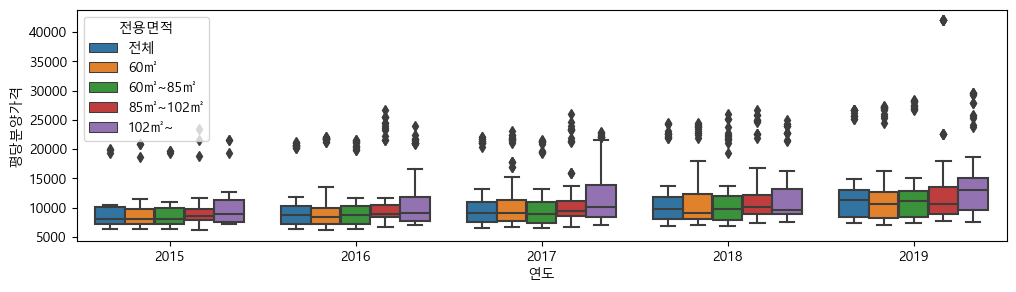

In [84]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

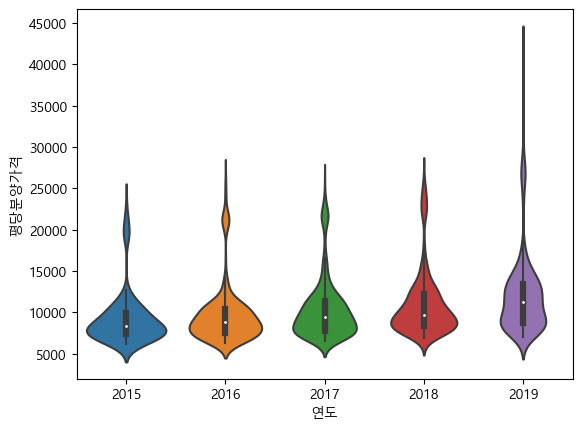

In [85]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

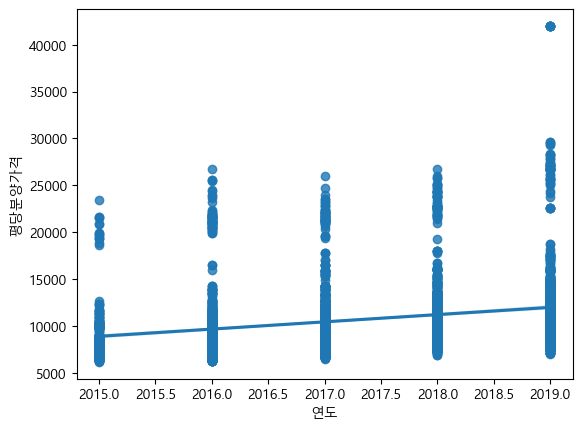

In [94]:
sns.regplot(data=df_last, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

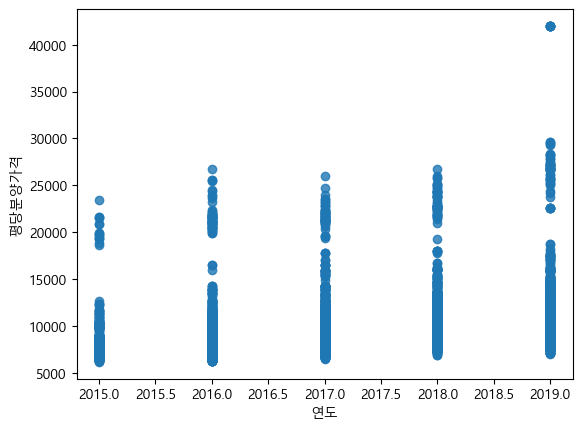

In [96]:
sns.regplot(data=df_last, x='연도', y='평당분양가격', ci=None, fit_reg=None) # --- 잔차 제거, 회귀선 제거

In [97]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [98]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [99]:
df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


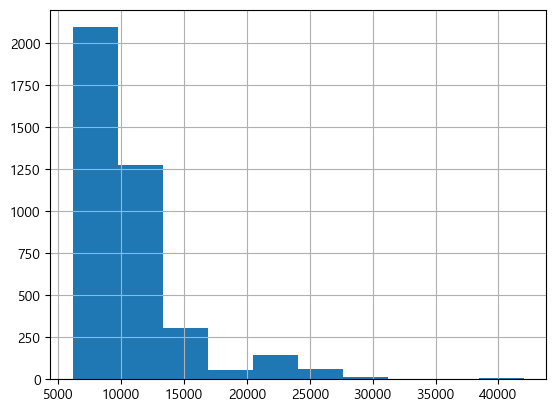

In [100]:
h = df_last["평당분양가격"].hist(bins=10)

In [101]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

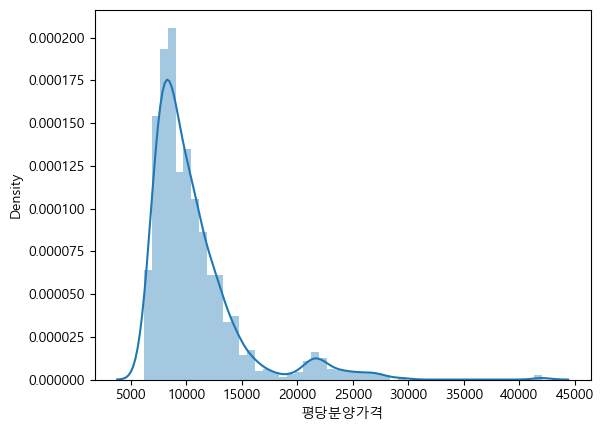

In [102]:
sns.distplot(price)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

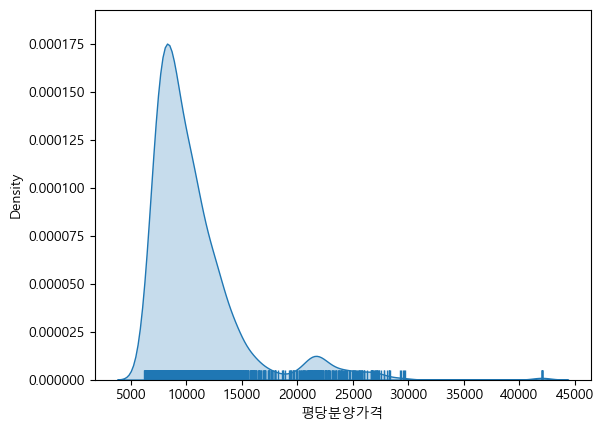

In [103]:
sns.kdeplot(price, shade=True)
sns.rugplot(price)